In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
vessels = pd.read_csv('data/vessels.csv.gz',compression='gzip')
vessels.head()

,_id,unifiedCount,imo,class_calc,generation_method,has_only_properties,imo_source,is_read_only,subclass_documented,name,...,name_fusion,owner_data_fusion,riskIndicator_fusion,serviceSpeed_fusion,size_fusion,status_fusion,subclass_documented_fusion,vessel_class_fusion,vessel_classification_fusion,recalc_age
0,0013b9cb66c349fce993732f,1.0,9756896.0,ServiceVessel,external_sources,1.0,NTV,1.0,Tug,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ihs,NaN,NaN,NaN
1,001f4e31ee5c7cbd06917423,1.0,9739616.0,Passenger,external_sources,1.0,NTV,1.0,RORO/Passenger,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ihs,NaN,NaN,NaN
2,002d37106a4280749c3e66ed,1.0,8797178.0,Fishing,external_sources,1.0,NTV,1.0,Fishing Vessel,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ihs,NaN,NaN,NaN
3,0030ebd18e5e41406e5f98ca,1.0,9778789.0,ServiceVessel,external_sources,1.0,NTV,1.0,Tug,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ihs,NaN,NaN,NaN
4,0032b4e89d483d7fcb48b2b3,1.0,8537396.0,Fishing,external_sources,1.0,NTV,1.0,Fishing Vessel,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ihs,NaN,NaN,NaN


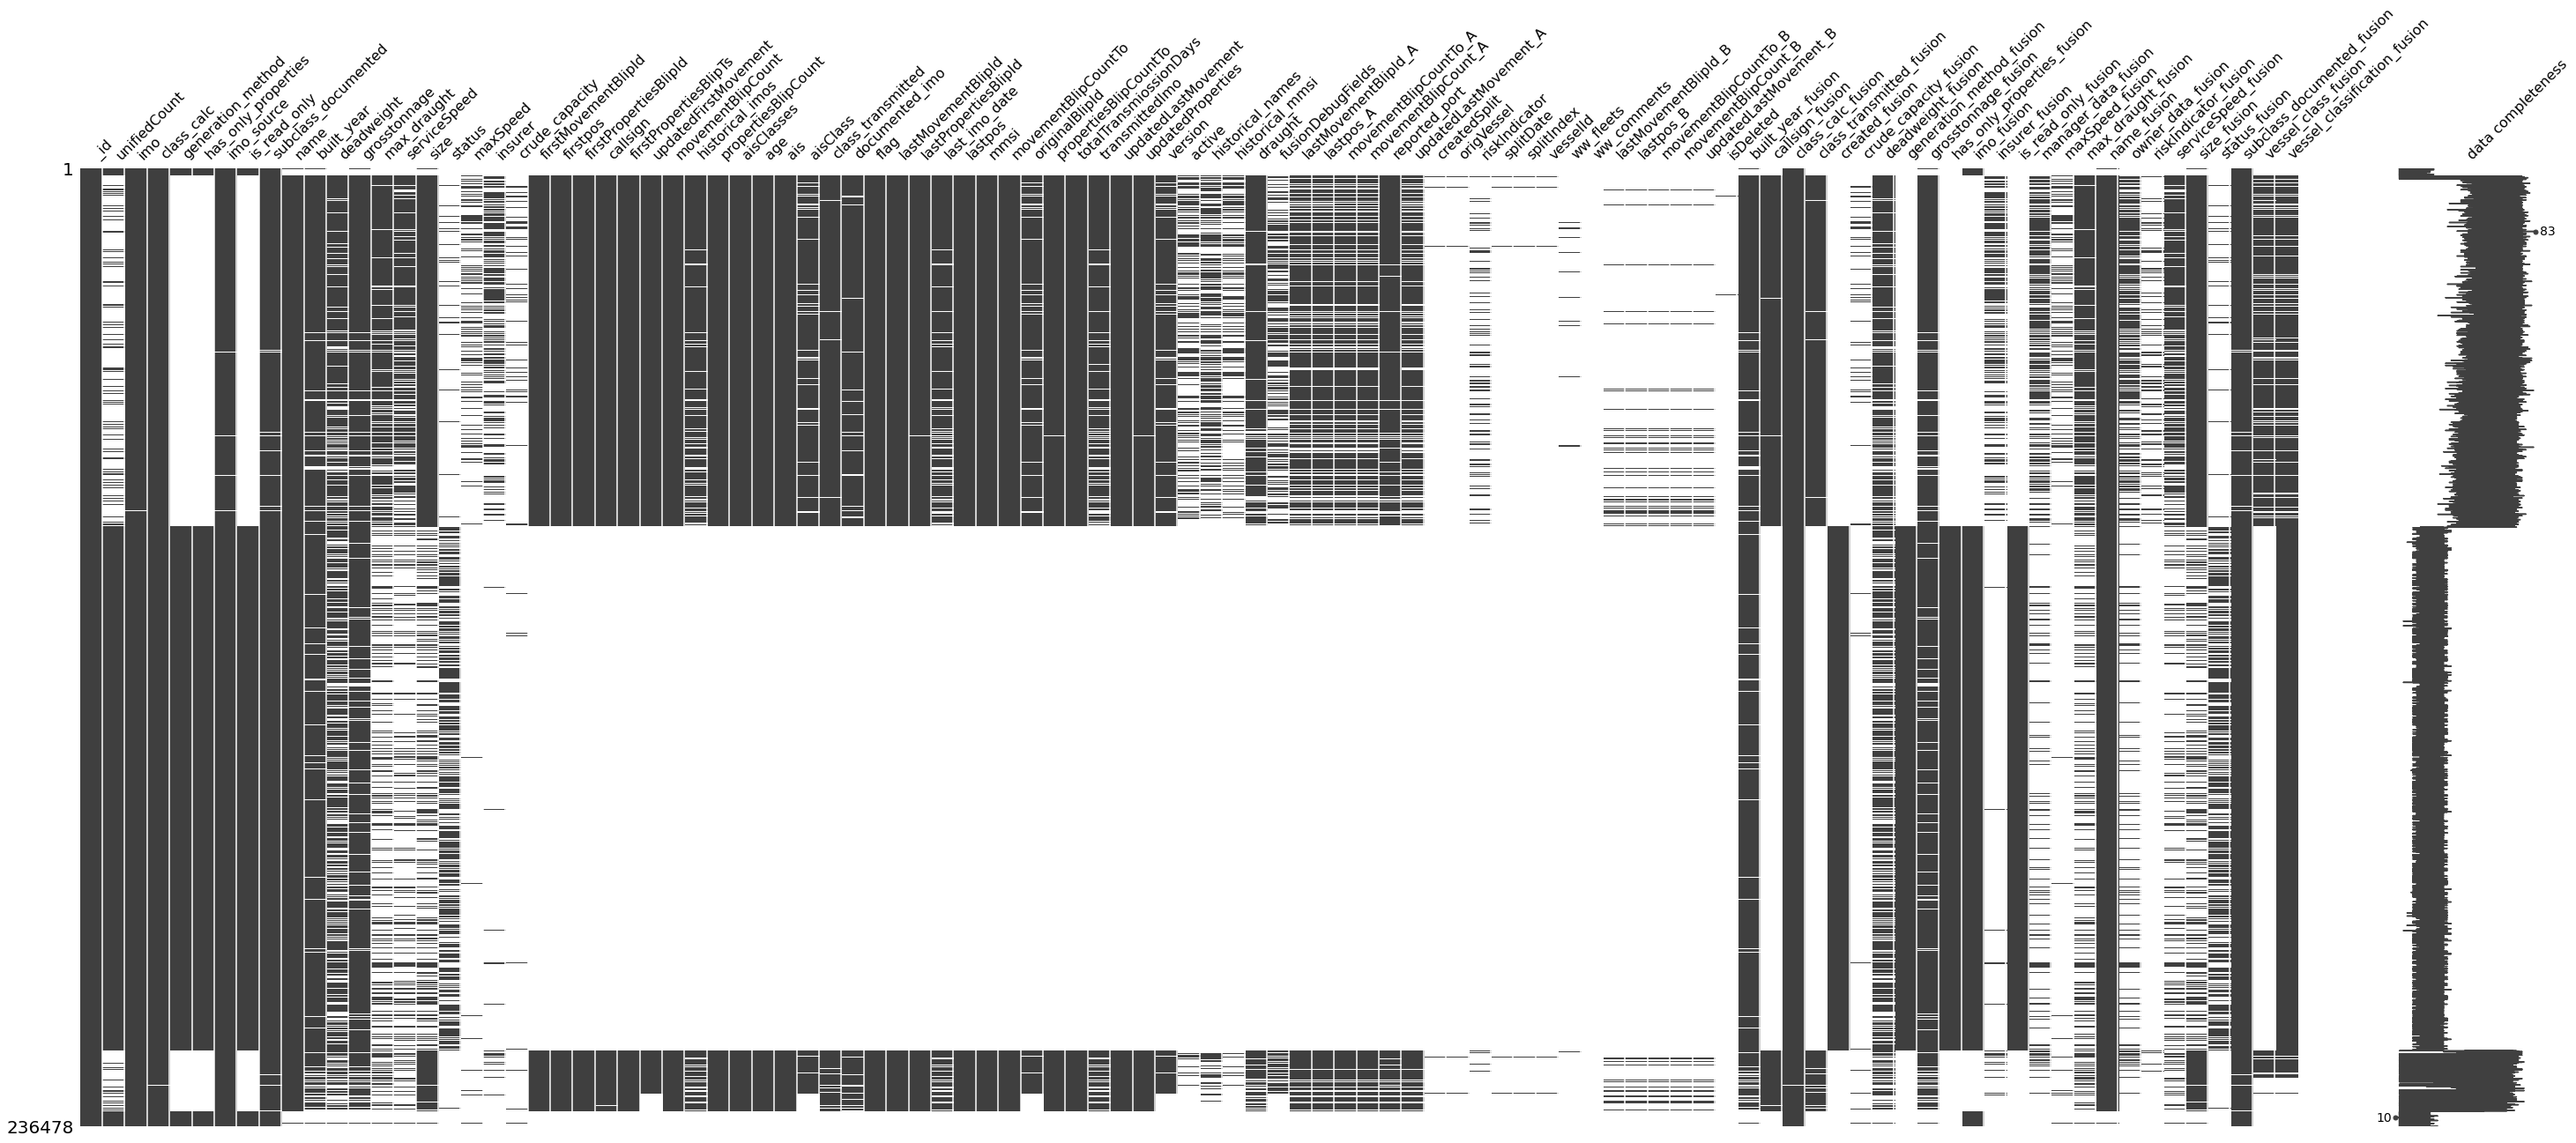

In [67]:
# import sys
# !{sys.executable} -m pip install missingno
%matplotlib inline
msno.matrix(vessels, labels=True,figsize=(50,20));

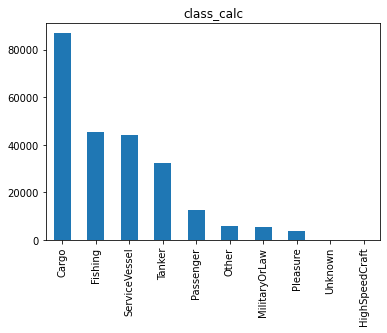

In [17]:
vessels['class_calc'].fillna('Unknown').value_counts().plot(kind='bar')
plt.title('class_calc');

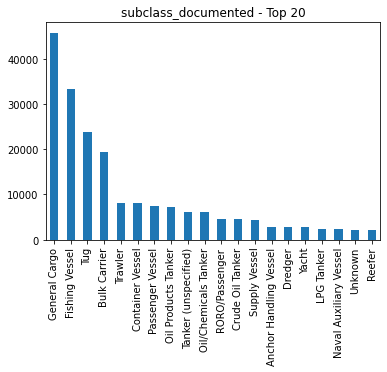

In [110]:
vessels['subclass_documented'].fillna('Unknown').value_counts().head(20).plot(kind='bar')
plt.title('subclass_documented - Top 20');

In [95]:
def plot_dist(df,col):
    
    sns.histplot(vessels[col].dropna())
    col_mean = vessels[col].mean()
    col_std = vessels[col].std()
    plt.title(f'{col} - mean: {round(col_mean)} std: {round(col_std)}');

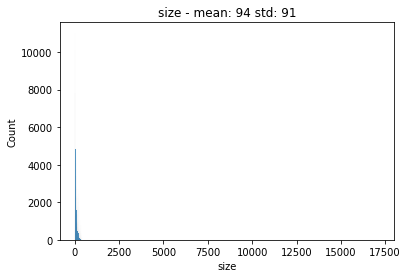

In [96]:
plot_dist(vessels,'size')

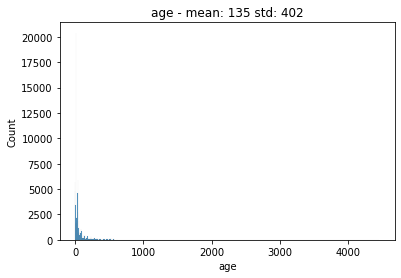

In [97]:
plot_dist(vessels,'age')

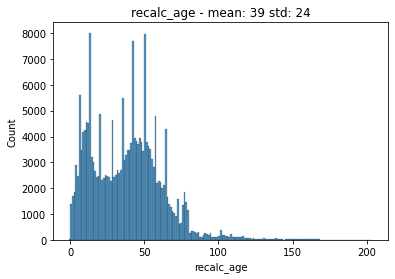

In [98]:
vessels['recalc_age'] = (2021 - vessels['built_year'])
plot_dist(vessels,'recalc_age')

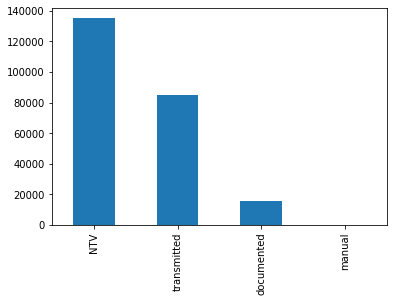

In [53]:
vessels['imo_source'].value_counts().plot(kind='bar');

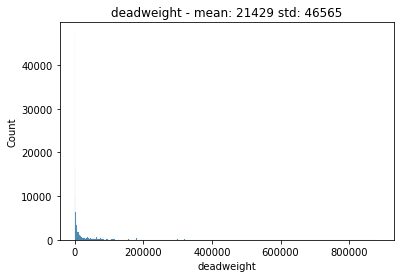

In [103]:
plot_dist(vessels,'deadweight')

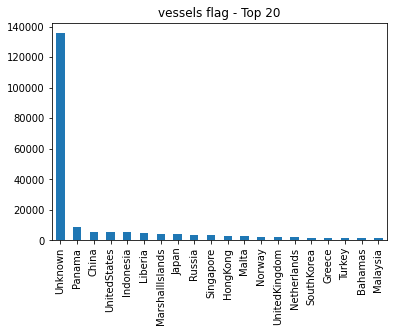

In [111]:
vessels['flag'].fillna('Unknown').value_counts().head(20).plot(kind='bar');
plt.title('vessels flag - Top 20');

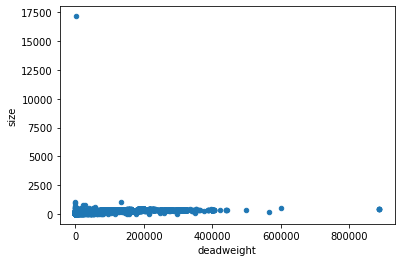

In [129]:
vessels[['deadweight','size']].plot(kind='scatter',x='deadweight',y='size');

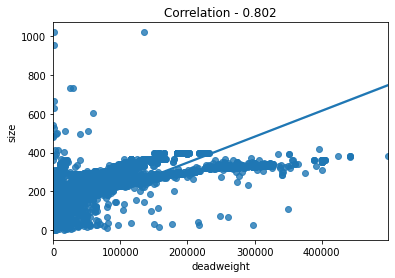

In [128]:
# size & weight correlation (outliers was removed)
sns.regplot(x="deadweight", y="size", data=vessels[(vessels['deadweight'] < 500000) & (vessels['size'] < 5000)])
plt.title('Correlation - %s' % round(vessels[(vessels['deadweight'] < 500000) & (vessels['size'] < 5000)][['deadweight','size']].corr().loc['size','deadweight'],3))
plt.show()